1. Setup Google Colab and Import Libraries

In [1]:
# Install required packages
!pip install imbalanced-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

All libraries imported successfully!
TensorFlow version: 2.19.0


2. Load and Explore the Dataset

In [2]:
# Load the dataset from Kaggle
# You can download the dataset from: https://www.kaggle.com/mlg-ulb/creditcardfraud
# Upload the CSV file to your Google Colab session

from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Basic dataset info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Saving creditcard.csv to creditcard.csv
Dataset Shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19

3. Data Exploration and Visualization

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Fraud Percentage: 0.17%


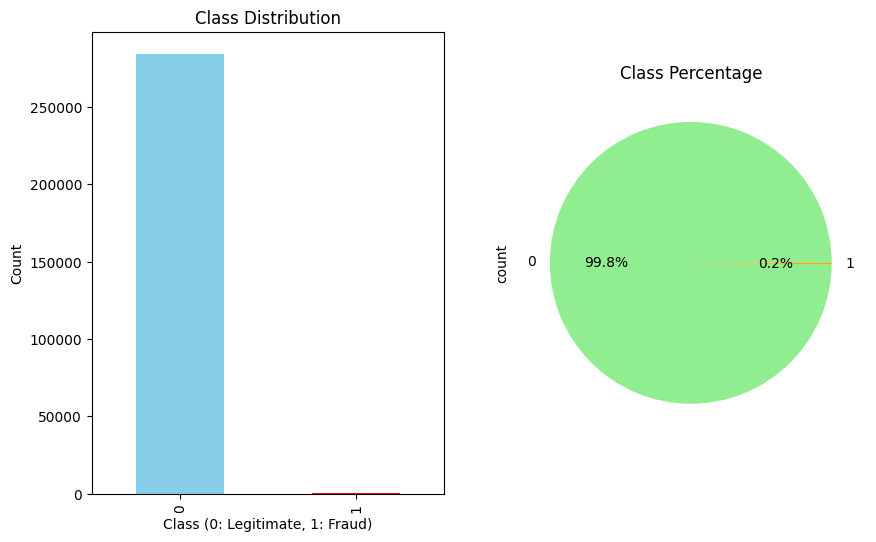

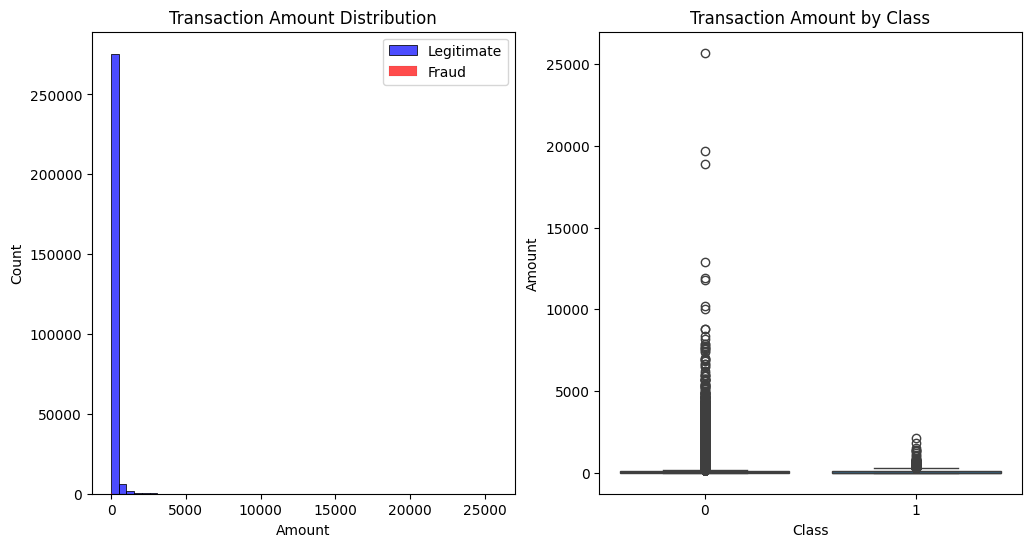

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())
print(f"Fraud Percentage: {df['Class'].value_counts()[1] / len(df) * 100:.2f}%")

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange'])
plt.title('Class Percentage')
plt.show()

# Distribution of Amount feature
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Legitimate', alpha=0.7)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', alpha=0.7)
plt.title('Transaction Amount Distribution')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

4. Data Preprocessing

In [4]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Fraud cases in training: {y_train.sum()}")
print(f"Fraud cases in test: {y_test.sum()}")

# Scale the features (excluding Time column as per best practices)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")

Training set size: (227845, 30)
Test set size: (56962, 30)
Fraud cases in training: 394
Fraud cases in test: 98
Feature scaling completed!


5. Handle Class Imbalance with SMOTE

In [5]:
# Apply SMOTE to handle class imbalance
print("Before SMOTE:")
print(f"Training set class distribution: {np.bincount(y_train)}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE:")
print(f"Training set class distribution: {np.bincount(y_train_balanced)}")

Before SMOTE:
Training set class distribution: [227451    394]

After SMOTE:
Training set class distribution: [227451 227451]


6. Build the Deep Learning Model

In [6]:
def create_model(input_dim):
    """
    Create a deep neural network model for fraud detection
    """
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

# Create model
model = create_model(X_train_balanced.shape[1])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

7. Train the Model

In [7]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Train the model
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9343 - loss: 0.1485 - precision: 0.9287 - recall: 0.9460 - val_accuracy: 0.9946 - val_loss: 0.0212 - val_precision: 0.2266 - val_recall: 0.8878 - learning_rate: 0.0010
Epoch 2/100
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9952 - loss: 0.0171 - precision: 0.9925 - recall: 0.9979 - val_accuracy: 0.9974 - val_loss: 0.0152 - val_precision: 0.3899 - val_recall: 0.8673 - learning_rate: 0.0010
Epoch 3/100
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9974 - loss: 0.0101 - precision: 0.9959 - recall: 0.9990 - val_accuracy: 0.9982 - val_loss: 0.0152 - val_precision: 0.4831 - val_recall: 0.8776 - learning_rate: 0.0010
Epoch 4/100
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0071 - precision: 0.9973 - recall: 0.9994 - val_accuracy: 0.9985 - val_loss: 0.0150 - val_precision: 0.5497 - val_recall: 0.8469 - learning_rate: 0.0010
Epoch 5/100
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/s

8. Model Evaluation

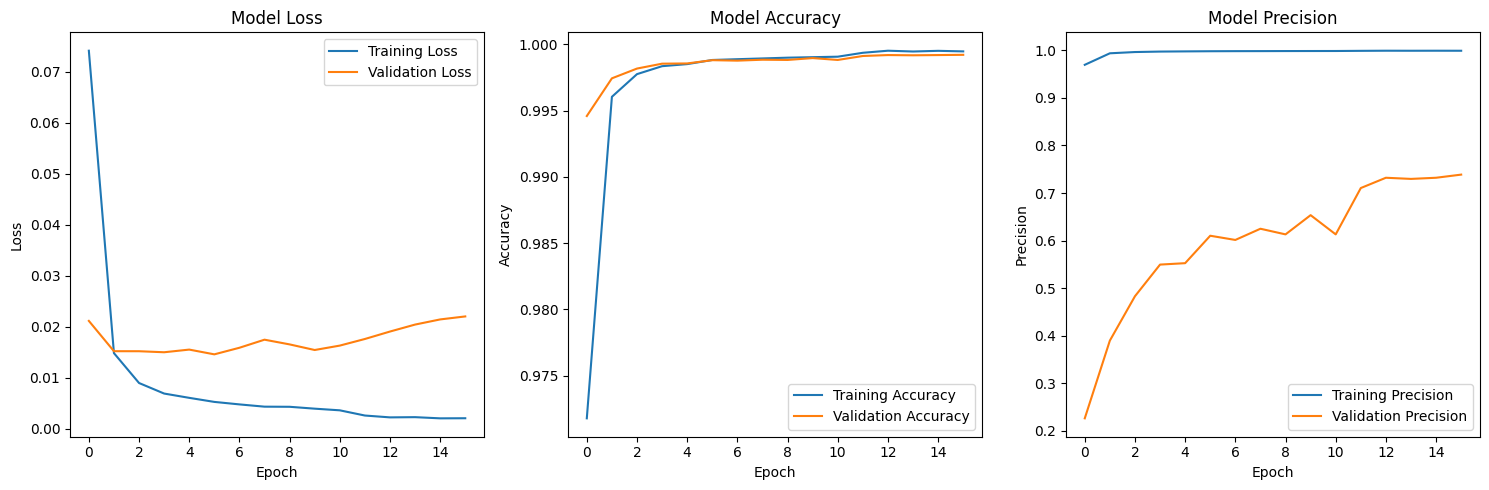

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
=== MODEL PERFORMANCE METRICS ===
Accuracy: 0.9988
Precision: 0.6103
Recall: 0.8469
F1-Score: 0.7094
ROC-AUC Score: 0.9744

=== GOALS ACHIEVEMENT ===
Accuracy Goal (≥95%): ✓ ACHIEVED
Precision Goal (≥90%): ✗ NOT ACHIEVED
Recall Goal (≥85%): ✗ NOT ACHIEVED
F1-Score Goal (≥90%): ✗ NOT ACHIEVED
ROC-AUC Goal (≥0.95): ✓ ACHIEVED


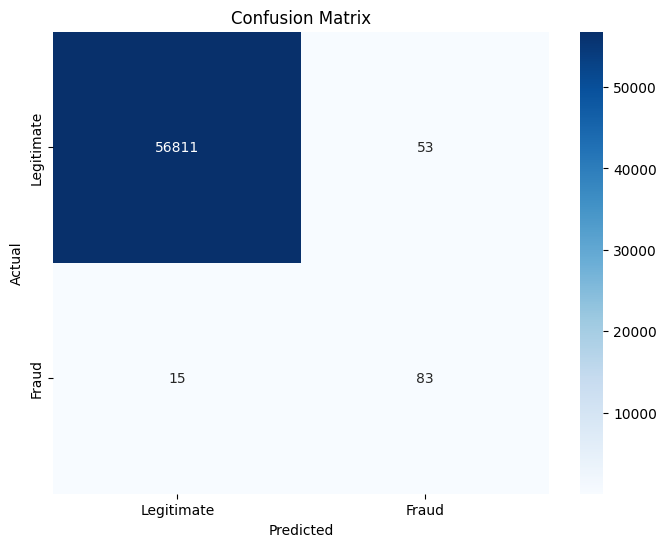


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56864
       Fraud       0.61      0.85      0.71        98

    accuracy                           1.00     56962
   macro avg       0.81      0.92      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [8]:
# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=== MODEL PERFORMANCE METRICS ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Check if goals are met
print("\n=== GOALS ACHIEVEMENT ===")
print(f"Accuracy Goal (≥95%): {'✓ ACHIEVED' if accuracy >= 0.95 else '✗ NOT ACHIEVED'}")
print(f"Precision Goal (≥90%): {'✓ ACHIEVED' if precision >= 0.90 else '✗ NOT ACHIEVED'}")
print(f"Recall Goal (≥85%): {'✓ ACHIEVED' if recall >= 0.85 else '✗ NOT ACHIEVED'}")
print(f"F1-Score Goal (≥90%): {'✓ ACHIEVED' if f1 >= 0.90 else '✗ NOT ACHIEVED'}")
print(f"ROC-AUC Goal (≥0.95): {'✓ ACHIEVED' if roc_auc >= 0.95 else '✗ NOT ACHIEVED'}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Fraud']))

9. Save the Model and Preprocessing Objects

In [9]:
# Save the trained model
model.save('credit_card_fraud_detection_model.h5')

# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

print("Model and preprocessing objects saved successfully!")

# Download the files to your local machine
files.download('credit_card_fraud_detection_model.h5')
files.download('scaler.pkl')

Model and preprocessing objects saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Save the trained model
model.save('credit_card_fraud_detection_model.keras')

# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

print("Model and preprocessing objects saved successfully!")

# Download the files to your local machine
files.download('credit_card_fraud_detection_model.keras')
files.download('scaler.pkl')

Model and preprocessing objects saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>